In [9]:
import os
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
wd = os.getcwd()
print (f'working directory: {wd}')


bucket = 'fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01'

working directory: /mnt/disks/store/ist_benchmarking


# Install pacage and grab scripts (only need to run once)
You won't need to do it again for other notebooks.

In [8]:
# # # copy scripts
# cmd = f'gsutil cp gs://{bucket}/notebooks/* {wd}'
# print (cmd)
# ! {cmd}

# # install pacakges
! pip install squidpy==1.2.3 
! pip install geopandas==0.13.0 
! pip install -U kaleido
! pip install rtree==1.0.1
! pip install rasterio
! pip install plotly
! pip install nbformat==5.10.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 1.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


# Copy data from bucket to VM

In [3]:
# # copy data
bucket = 'fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01'
cmd = f'gsutil cp -r gs://{bucket}/data {wd}'
print (cmd)
! {cmd}

gsutil cp -r gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data /home/jupyter/iST_Platform_Comparison/edit
Copying gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data/Sample_Info_HTMA_TMA - Sheet1.csv...
Copying gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data/Sample_Info_NORMAL_TMA - Sheet1.csv...
Copying gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data/cell_by_gene_csv/cosmx_multitissue_htma_cell_by_gene.parquet.gzip...
- [3 files][ 27.0 MiB/ 27.0 MiB]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data/cell_by_gene_csv/cosmx_multitissue_normal_cell_by_gene.parquet.gzip...
Copying gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data/cell_by_gene_csv/merscope_breast_htma_cell_by_gene.parq

Copying gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data/merscope_breast_normal/cell_by_gene.csv...
Copying gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data/merscope_breast_normal/cell_metadata.csv...
Copying gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data/merscope_breast_normal/dapi_by_core/mosaic_DAPI_z3.tif_.gstmp...
Copying gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data/merscope_breast_normal/merscope_breast_normal_polygon.cpg...
Copying gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data/merscope_breast_normal/merscope_breast_normal_polygon.dbf...
Copying gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data/merscope_breast_normal/merscope_breast_normal_polygon.prj...
Copying gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data/merscope_breast_normal/merscope_breast_normal_polygon.shp...
Copying gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data/merscope_breast_normal/merscope_breast_normal_polygon.shx...
Copying gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data/merscope_breast_norma

In [6]:
sample = '2024_xenium_breast_htma'

# Cell level data

In [7]:
gdf = gpd.read_parquet(f'{wd}/data/cell_level_csv/{sample}_cell_level.parquet.gzip')
gdf.head()

# you can load the data faster use pandas with pyarrow engine if you don't care the geometry column
# df = pd.read_parquet(f'data/cell_by_gene_csv/{sample}_cell_by_gene.parquet.gzip', engine='pyarrow')


,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,nucleus_area,x,y,core,tissue_type,geometry
0,aaaadbcd-1,382.623779,995.990967,19,0,0,0,0,19,59.741721,32.602814,995.990967,382.623779,171,Marker,POINT (995.99097 382.62378)
1,aaabinkc-1,384.647705,1244.904053,13,0,0,0,0,13,54.774533,24.835938,1244.904053,384.647705,171,Marker,POINT (1244.90405 384.64771)
2,aaabkame-1,383.582214,1237.441162,16,0,0,0,0,16,44.117658,13.637188,1237.441162,383.582214,171,Marker,POINT (1237.44116 383.58221)
3,aaacdalg-1,321.743835,1035.916138,9,0,0,0,0,9,30.299845,13.998438,1035.916138,321.743835,171,Marker,POINT (1035.91614 321.74384)
4,aaacgpid-1,322.457642,1041.022461,9,0,0,0,0,9,35.447658,NaN,1041.022461,322.457642,171,Marker,POINT (1041.02246 322.45764)


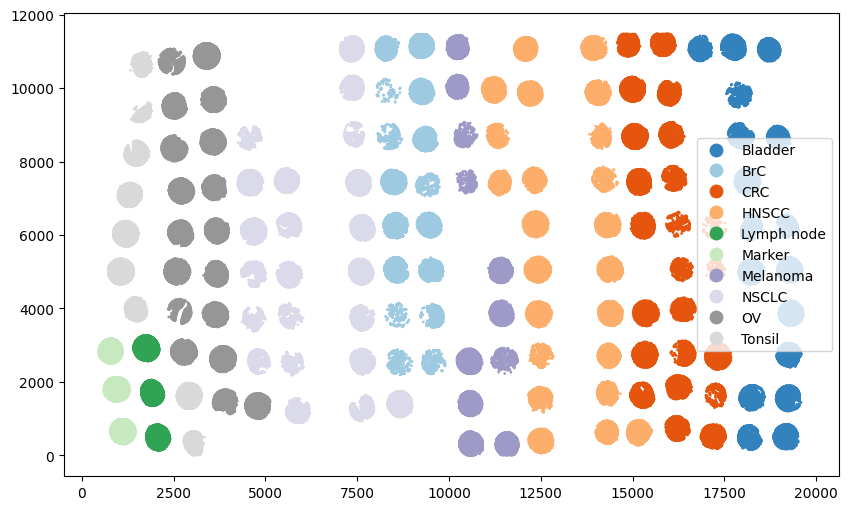

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot('tissue_type',aspect=1, markersize=1, ax=ax, legend=True, cmap='tab20c')
plt.show()

# Cell by gene data

In [10]:
df = pd.read_parquet(f'{wd}/data/cell_by_gene_csv/{sample}_cell_by_gene.parquet.gzip', engine='pyarrow')
df = df.reset_index(drop=True)
df.head()

,core,tissue_type,ABCC11,ACTA2,ACTG2,ADAM9,ADGRE5,ADH1B,ADIPOQ,AGR3,...,UnassignedCodeword_0497,UnassignedCodeword_0498,UnassignedCodeword_0499,VOPP1,VWF,WARS,ZEB1,ZEB2,ZNF562,cell_id
0,171,Marker,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,aaaadbcd-1
1,171,Marker,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,aaabinkc-1
2,171,Marker,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,aaabkame-1
3,171,Marker,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,aaacdalg-1
4,171,Marker,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,aaacgpid-1


# Gene level data

In [11]:
df = pd.read_csv(f'{wd}/data/gene_level_csv/gene_level_csv_{sample}.csv', engine='pyarrow')
df.head()

,core,gene,tissue_type,count,code_type
0,1,ABCC11,Bladder,90,gene
1,1,ACTA2,Bladder,935,gene
2,1,ACTG2,Bladder,802,gene
3,1,ADAM9,Bladder,1019,gene
4,1,ADGRE5,Bladder,271,gene


# Transcript level data

In [12]:
gdf = gpd.read_parquet(f'{wd}/data/transcript_level_csv/{sample}_transcript_level.parquet.gzip')
gdf.head()

,core,tissue_type,transcript_id,cell_id,overlaps_nucleus,gene,global_x,global_y,z_location,qv,fov_name,nucleus_distance,codeword_index,modality,geometry
0,170,Lymph node,281981782851630,fbamikmj-1,0,NKG7,153.443268,1999.059326,26.074429,40.000000,G1,0.816286,334,xenium,POINT (1999.05933 153.44327)
1,170,Lymph node,281981782851643,fbamikmj-1,1,ITGAX,156.906540,1995.951904,22.569859,40.000000,G1,0.000000,195,xenium,POINT (1995.95190 156.90654)
2,170,Lymph node,281981782851650,fbamikmj-1,1,ITGAX,157.524414,1993.435303,25.381569,31.106482,G1,0.000000,195,xenium,POINT (1993.43530 157.52441)
3,170,Lymph node,281981782851652,gnmpgfpd-1,1,LPXN,158.078476,1977.405029,27.601223,40.000000,G1,0.000000,316,xenium,POINT (1977.40503 158.07848)
4,170,Lymph node,281981782851656,fbamdhdg-1,0,TCIM,159.661682,1983.071289,22.600060,40.000000,G1,0.426842,140,xenium,POINT (1983.07129 159.66168)
